# Beispiel zur Fourierentwicklung

In [1]:
import numpy as np
from sympy import symbols, integrate, lambdify, exp, sin, cos, pi
import scipy.integrate as scint
import matplotlib.pyplot as plt
from IPython.display import Math, display

Für das Beispiel benutzen wir zwei verschiedene orthonormale Basen für den $L_2[-1,1]$. Wir definieren das Skalarprodukt im $L_2$ und die Norm:

In [2]:
t = symbols('t')

def dot(x,y):
    return integrate(x*y,(t,-1,1))
def norm(x):
    return dot(x,x)**(1/2)
def dotN(x,y):
    xy = lambdify(t, x*y,'numpy')
    return scint.quad(xy, -1, 1)[0]
def normN(x):
    return dotN(x,x)**(1/2)

## Legendre'sche Polynome

Die Legendre'schen Polynome folgenden aus der Kontruktion eines ONS mit Hilfe des Verfahren nach Schmidt (vgl. vorangehendes Beispiel):

In [3]:
# Orthonormalbasis nach Schmidt
N = 9
yi = [t**i for i in range(N)]
xi = [yi[0]/norm(yi[0])]
for i in range(1,N):
    s = 0
    for j in range(i):
        s += dot(yi[i],xi[j])*xi[j]
    zi=yi[i]-s
    xi.append(zi/norm(zi))

In [4]:
for xii in xi:
    display(xii)

0.707106781186547

1.22474487139159*t

2.37170824512628*t**2 - 0.790569415042095

4.67707173346743*t**3 - 2.80624304008046*t

9.2807765030735*t**4 - 7.95495128834872*t**2 + 0.795495128834872

18.4685120543048*t**5 - 20.5205689492276*t**3 + 4.39726477483448*t

36.8085471137468*t**6 - 50.1934733369281*t**4 + 16.7311577789763*t**2 - 0.796721798998898

73.4290553655431*t**7 - 118.616166359723*t**5 + 53.9164392544196*t**3 - 5.99071547271328*t

146.570997825634*t**8 - 273.599195941123*t**6 + 157.845689965986*t**4 - 28.6992163574405*t**2 + 0.797200454372895

Mit Hilfe dieses ONS soll die Fourierentwicklung der Funktion

$$f(t) = e^{-5 t^2}$$

berechnet werden.

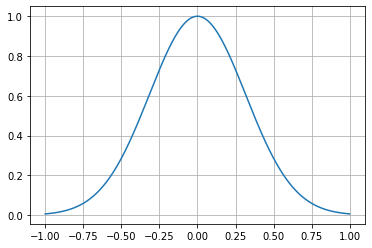

In [5]:
f = exp(-5*t**2)
fn = lambdify(t, f, 'numpy')

tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp))
plt.grid()
plt.show()

Die Fourierkoeffizienten sind gegeben durch

$$\alpha_k = (f,x_i)_{L_2}\quad \forall i = 1, \ldots, n.$$

Die Berechnung nutzt das Skalarprodukt mit numerischer Integration.

In [6]:
alpha = [dotN(f, xii) for xii in xi]
alpha

[0.5596217150491691,
 0.0,
 -0.4411693576778274,
 0.0,
 0.2148123794839546,
 0.0,
 -0.07762200243541717,
 0.0,
 0.0221421344164393]

Damit erhalten wir die Fourierentwicklung von $f(t)$

In [7]:
s = 0
for alphai, xii in zip(alpha,xi):
    s += alphai*xii
sn = lambdify(t, s, 'numpy')
s

3.24539473540683*t**8 - 8.91522330646548*t**6 + 9.38478407796753*t**4 - 4.68931489413068*t**2 + 0.994864373177097

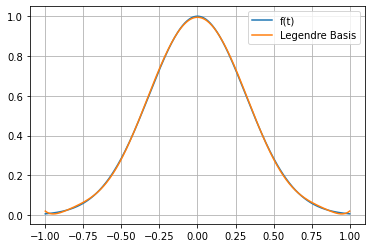

In [8]:
tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp),label='f(t)') 
plt.plot(tp, sn(tp),label='Legendre Basis')
plt.legend()
plt.grid()
plt.show()

Wir überprüfen die Parsevallsche Gleichung (Vollständigkeitsrelation):

$$\sum_{k=1}^N |(x,x_k)|^2 \le \sum_{k=1}^\infty |(x,x_k)|^2 = \|x\|^2$$

In [9]:
np.sum(np.array(alpha)**2)-normN(f)**2

-2.810714668699532e-05

## Trigonometrische Funktionen

Als zweites Set von Basisfunktionen benutzen wir $\sin(\pi i t)$ und $\cos(\pi i t)$.

In [10]:
yi = []
N = 5
yi.append(1/2)
for i in range(1,N):
    yi.append(cos(pi*i*t))
    yi.append(sin(pi*i*t))
print('Anzahl Basisfunktionen: '+str(len(yi)))

Anzahl Basisfunktionen: 9


Diese Funktionen sind orthogonal, entsprechend erhalten wir dieses Set unverändert aus dem Schmidtschen Orthogonalisierungsverfahren:

In [11]:
# Orthonormalbasis nach Schmidt
xi = [yi[0]/normN(yi[0])]
for i in range(1,2*N-1):
    s = 0
    for j in range(i):
        s += dotN(yi[i],xi[j])*xi[j]
    zi=yi[i]-s
    xi.append(zi/normN(zi))
    display(xi[-1])

1.0*cos(pi*t) - 9.81307786677359e-17

1.0*sin(pi*t)

-1.22011185168313e-17*cos(pi*t) + 1.0*cos(2*pi*t) + 1.03037317601123e-16

-9.90337261694782e-18*sin(pi*t) + 1.0*sin(2*pi*t)

1.23822596516741e-33*cos(pi*t) - 1.01484627287186e-16*cos(2*pi*t) + 1.0*cos(3*pi*t) - 1.58362563377161e-17

2.04850984122971e-34*sin(pi*t) - 2.0684971882448e-17*sin(2*pi*t) + 1.0*sin(3*pi*t)

-4.42531299261824e-17*cos(pi*t) + 1.31330734865152e-16*cos(2*pi*t) + 8.86382073502645e-17*cos(3*pi*t) + 1.0*cos(4*pi*t) - 3.92523114670944e-17

7.95881701368516e-17*sin(pi*t) - 1.53007052862912e-17*sin(2*pi*t) - 6.41357085318366e-17*sin(3*pi*t) + 1.0*sin(4*pi*t)

Auf den ersten Blick sieht das Resultat nicht unverändert aus. Man beachte jedoch, dass die Koeffizienten numerisch null sind!

Für die Fourier-Koeffizienten erhalten wir:

In [12]:
alpha2 = [dotN(f, xii) for xii in xi]
alpha2

[0.5596217150491691,
 0.4850805845912827,
 0.0,
 0.10914699708164807,
 0.0,
 0.010077740674845966,
 0.0,
 -0.00025517128989830523,
 0.0]

und damit die Fourierreihe

In [13]:
s2 = 0
for alphai, xii in zip(alpha2,xi):
    s2 += alphai*xii
s2n = lambdify(t, s2, 'numpy')
s2

0.485080584591283*cos(pi*t) + 0.109146997081648*cos(2*pi*t) + 0.010077740674846*cos(3*pi*t) - 0.000255171289898305*cos(4*pi*t) + 0.395712309610513

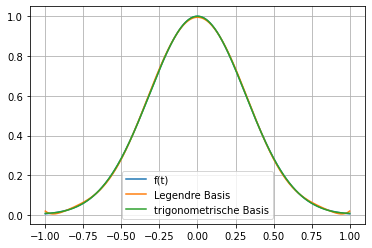

In [14]:
tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp),label='f(t)') 
plt.plot(tp, sn(tp),label='Legendre Basis')
plt.plot(tp, s2n(tp),label='trigonometrische Basis')
plt.legend()
plt.grid()
plt.show()

Parsevallsche Gleichung (Vollständigkeitsrelation):

$$\sum_{k=1}^N |(x,x_k)|^2 \le \sum_{k=1}^\infty |(x,x_k)|^2 = \|x\|^2$$

In [15]:
np.sum(np.array(alpha2)**2)-normN(f)**2

-4.505698535384184e-07

## Vergleich

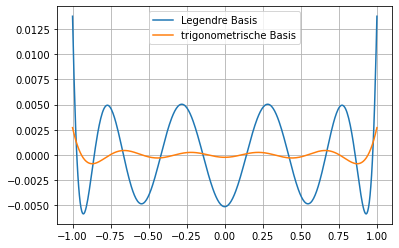

In [16]:
plt.plot(tp, sn(tp)-fn(tp),label='Legendre Basis')
plt.plot(tp, s2n(tp)-fn(tp),label='trigonometrische Basis')
plt.legend()
plt.grid()
plt.show()